In [4]:
# all necessary packages
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score

* **DOMAIN:** Automobile 
* **CONTEXT:**  The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The 
vehicle may be viewed from one of many different angles. 
* **DATA  DESCRIPTION:**  The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles  were 
used  for  the  experiment:  a  double  decker  bus,  Cheverolet  van,  Saab  9000  and  an  Opel  Manta  400  cars.  This  particular  combination  of  vehicles 
was  chosen  with  the  expectation  that  the  bus,  van  and  either  one  of  the  cars  would  be  readily  distinguishable,  but  it  would  be  more  difficult  to 
distinguish between the cars.
* All the features are numeric i.e. geometric features extracted from the silhouette. 
* **PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model and compare relative results.

STEPS AND TASK

<b>1. Data Understanding & Cleaning:
<br><b>A. Read ‘vehicle.csv’ and save as DataFrame.

In [32]:
vec_df = pd.read_csv('vehicle.csv')
vec_df.sample(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
599,93,39.0,63.0,146.0,58.0,7,128.0,52.0,18.0,134,149.0,246.0,158.0,63.0,9.0,7.0,198.0,204,car
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
123,90,36.0,57.0,130.0,57.0,6,121.0,56.0,17.0,127,137.0,216.0,132.0,68.0,22.0,23.0,190.0,195,car


<b>B. Check percentage of missing values and impute with correct approach.

In [33]:
#percent wise
(100 * vec_df.isnull().sum()/len(vec_df)).round(1).astype(str) + '%'

compactness                    0.0%
circularity                    0.6%
distance_circularity           0.5%
radius_ratio                   0.7%
pr.axis_aspect_ratio           0.2%
max.length_aspect_ratio        0.0%
scatter_ratio                  0.1%
elongatedness                  0.1%
pr.axis_rectangularity         0.4%
max.length_rectangularity      0.0%
scaled_variance                0.4%
scaled_variance.1              0.2%
scaled_radius_of_gyration      0.2%
scaled_radius_of_gyration.1    0.5%
skewness_about                 0.7%
skewness_about.1               0.1%
skewness_about.2               0.1%
hollows_ratio                  0.0%
class                          0.0%
dtype: object

In [34]:
#number of null value records
vec_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

values that are missing are negligible with 0.7% being the highest. We can droop missing values from the dataframe

In [35]:
#drooping null values
vec_df.dropna(inplace=True)
vec_df.shape

(813, 19)

<b>C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

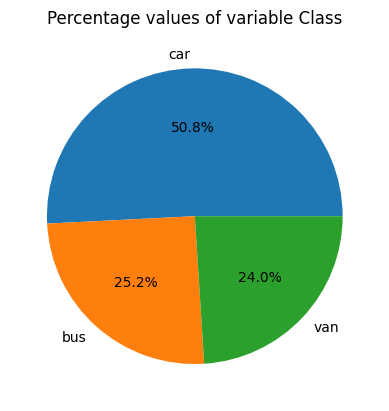

In [36]:
plt.pie(vec_df['class'].value_counts(normalize=True), labels=vec_df['class'].value_counts(normalize=True).index, autopct='%1.1f%%');
plt.title("Percentage values of variable Class");

<b>D. Check for duplicate rows in the data and impute with correct approach.

In [37]:
vec_df.duplicated().sum()

0

There are no duplicate values in the df

<b>2. Data Preparation:
<b><br>A. Split data into X and Y. [Train and Test optional]

In [38]:
#encoding the class variable with suitable values as below
replaceStruct = {
                "class": {"car": 0, "bus": 1, "van":2}  
                }
vec_df_temp = vec_df.replace(replaceStruct)

C:\Users\charansakki\AppData\Local\Temp\ipykernel_40716\3510878148.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vec_df_temp = vec_df.replace(replaceStruct)


In [39]:
x = vec_df_temp.drop('class', axis=1)
y = vec_df_temp['class']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=1)

<b> B. Standardize the Data.

In [41]:
# Standardizing using zscore
x_train_scaled = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)

<b>3. Model Building:
<b><br>A. Train a base Classification model using SVM.

In [42]:
SVM_1 = SVC()
SVM_1.fit(x_train_scaled, y_train)

SVC()

<b>B. Print Classification metrics for train data.

In [43]:
model_score = SVM_1.score(x_train_scaled, y_train)
y_predict = SVM_1.predict(x_train_scaled)
print('Score of the model %.2f' %model_score)
print(classification_report(y_train, y_predict))

Score of the model 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       318
           1       0.99      0.98      0.99       169
           2       0.93      1.00      0.96       163

    accuracy                           0.98       650
   macro avg       0.97      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650



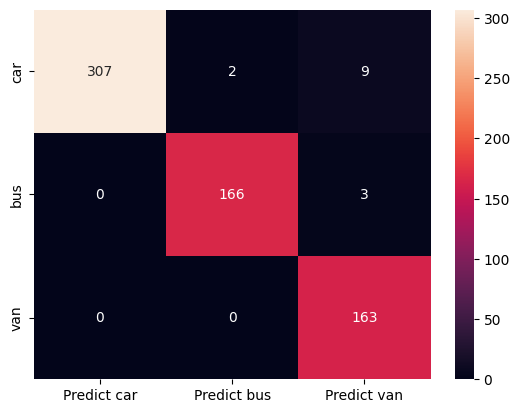

In [44]:
cm = metrics.confusion_matrix(y_train, y_predict, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["car", "bus", "van"]], columns = [i for i in ["Predict car","Predict bus","Predict van"]])
sns.heatmap(df_cm, annot=True, fmt='g');

<b> C. Apply PCA on the data with 10 components.

In [45]:
pca = PCA(n_components=10)
pca.fit(x_train_scaled)
print(pca.explained_variance_ratio_)

[0.52145131 0.16589632 0.10807145 0.06539523 0.05181525 0.02915165
 0.02112107 0.012652   0.00857042 0.00507216]


<b> D. Visualize Cumulative Variance Explained with Number of Components.

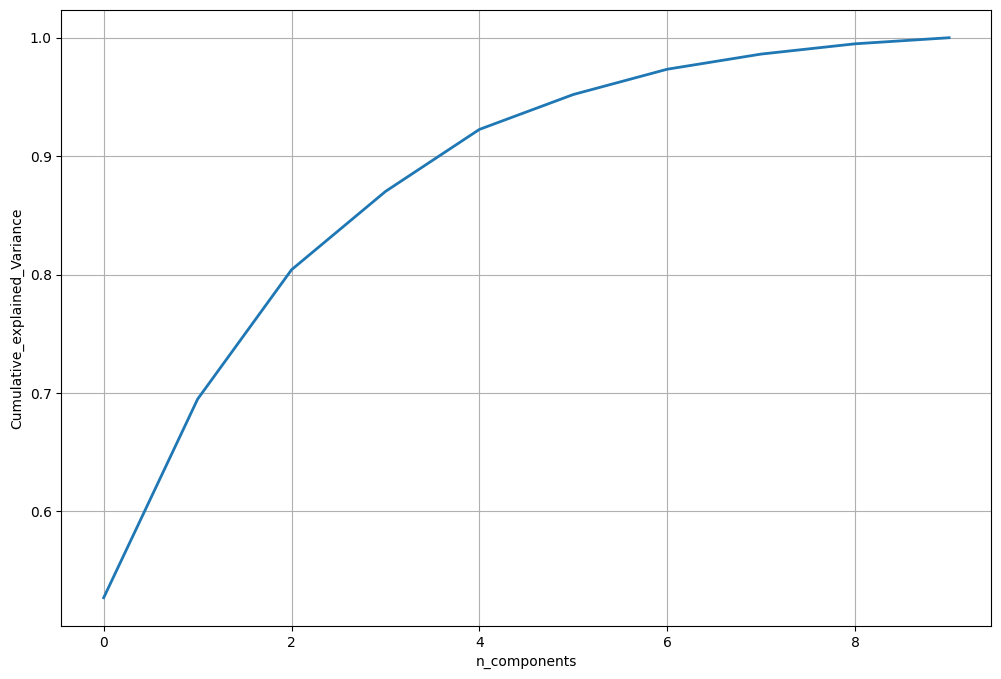

In [46]:
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(12,8))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis=('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_Variance')
plt.show()

<b> E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

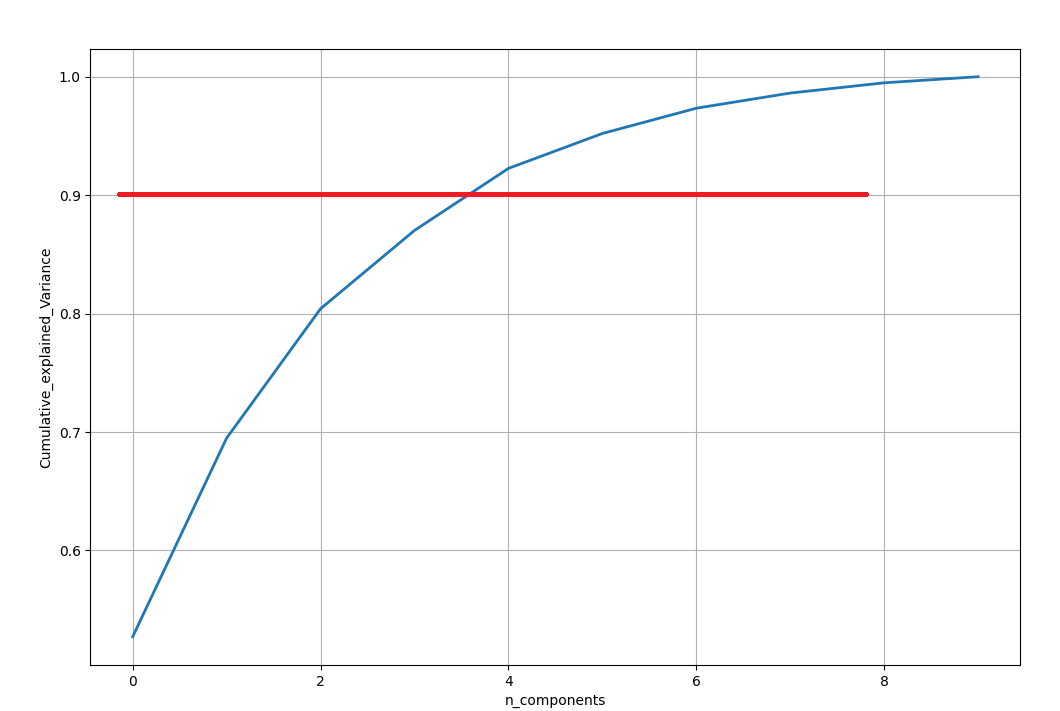

<b>F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

clearly n_components=4 is where cumalative variance is explained >90%

In [47]:
pca_2 = PCA(n_components=4)
pca_2.fit(x_train_scaled)
print(pca_2.explained_variance_ratio_)

[0.52145131 0.16589632 0.10807145 0.06539523]


<b> G. Train SVM model on components selected from above step.

In [48]:
x_train_pca = pca_2.transform(x_train_scaled)

In [49]:
SVM_2 = SVC()
SVM_2.fit(x_train_pca, y_train)

SVC()

<b> H. Print Classification metrics for train data of above model and share insights.

In [50]:
model_score = SVM_2.score(x_train_pca, y_train)
y_predict = SVM_2.predict(x_train_pca)
print('Score of the model %.2f' %model_score)
print(classification_report(y_train, y_predict))

Score of the model 0.79
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       318
           1       0.85      0.66      0.74       169
           2       0.64      0.82      0.72       163

    accuracy                           0.79       650
   macro avg       0.78      0.77      0.77       650
weighted avg       0.80      0.79      0.79       650



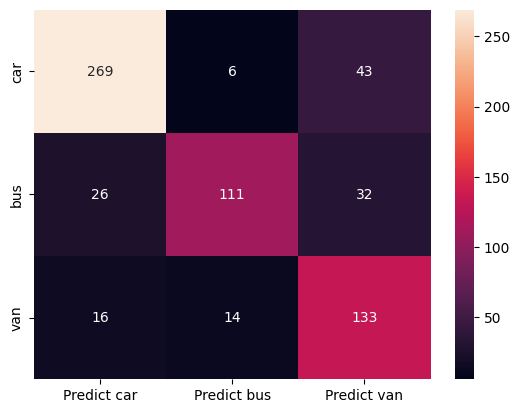

In [51]:
cm = metrics.confusion_matrix(y_train, y_predict, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["car", "bus", "van"]], columns = [i for i in ["Predict car","Predict bus","Predict van"]])
sns.heatmap(df_cm, annot=True, fmt='g');

* The ealier SVM model build on 19 scaled variable train data set gave us a score of 98%
* The SVM model build on 4 pca components variable train data set gave us a score of 79%
* There is a total of 19% drop in overall accuracy of the model.
* One can say the model is performing poorer here, but we are only using 4 components out of 18 i.e. only 21% of the data/information used and we are able to get a score of 79%
* It is a huge achievement and a great overall reduction in the infoormation.
* Also, we have used the minium component above 90% thershold i.e. 4, I still believe using 6 component will give us far better result that this

<b>4. Performance Improvement:
<b><br>A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [52]:
# lets see what is the optimal number of n componets that we can use
n_comp = [4,5,6,7,8,9,10]
for n in n_comp:
    pca = PCA(n_components=n)
    pca.fit(x_train_scaled)
    x_train_temp = pca.transform(x_train_scaled)
    SVM = SVC()
    SVM.fit(x_train_temp, y_train)
    model_score = SVM.score(x_train_temp, y_train)
    print('Score of the SVM model with pca components ', n, 'is %.2f' %model_score)

Score of the SVM model with pca components  4 is 0.79
Score of the SVM model with pca components  5 is 0.80
Score of the SVM model with pca components  6 is 0.90
Score of the SVM model with pca components  7 is 0.94
Score of the SVM model with pca components  8 is 0.96
Score of the SVM model with pca components  9 is 0.96
Score of the SVM model with pca components  10 is 0.96


In [53]:
pca_3 = PCA(n_components=7)
pca_3.fit(x_train_scaled)
x_train_pca = pca_3.transform(x_train_scaled)

In [54]:
#Hyperparamter tuning using Gridsearch
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(estimator=svm, param_grid = param_grid)
grid = grid.fit(x_train_pca, y_train)

model_tuned = grid.best_estimator_
model_tuned.fit(x_train_pca,y_train)

SVC(C=100, gamma=0.01)

In [63]:
SVM.score(x_train_pca, y_train)

0.9615384615384616

so best performace is when n_component is 7 and for SVM c=100 and gamma=0.01 and kernel=rbf

<b> B. Share best Parameters observed from above step.

* We clearly see that with n_components = 7 we have got a score of 94%. 
* By reducing 63% of the variable, we are able to get a score of 96% which is only 2% lower than the model which was usiing all 19 components

In [60]:
pca_3 = PCA(n_components=7)
pca_3.fit(x_train_scaled)
x_train_pca = pca_3.transform(x_train_scaled)

SVM = SVC(C=100, gamma=0.01, kernel = 'rbf')
SVM.fit(x_train_pca, y_train)
model_score = SVM.score(x_train_pca, y_train)
print('Score of the SVM model with pca components ', 7, 'is %.2f' %model_score)

Score of the SVM model with pca components  7 is 0.96


<b> C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with 
insights.

In [61]:
model_score = SVM.score(x_train_pca, y_train)
y_predict = SVM.predict(x_train_pca)
print('Score of the model %.2f' %model_score)
print(classification_report(y_train, y_predict))

Score of the model 0.96
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.96      0.96      0.96       169
           2       0.94      0.98      0.96       163

    accuracy                           0.96       650
   macro avg       0.96      0.97      0.96       650
weighted avg       0.96      0.96      0.96       650



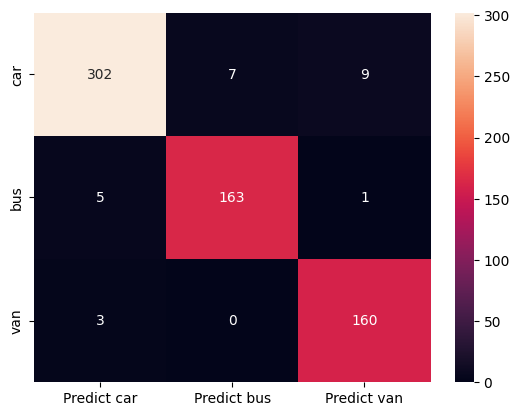

In [62]:
cm = metrics.confusion_matrix(y_train, y_predict, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["car", "bus", "van"]], columns = [i for i in ["Predict car","Predict bus","Predict van"]])
sns.heatmap(df_cm, annot=True, fmt='g');

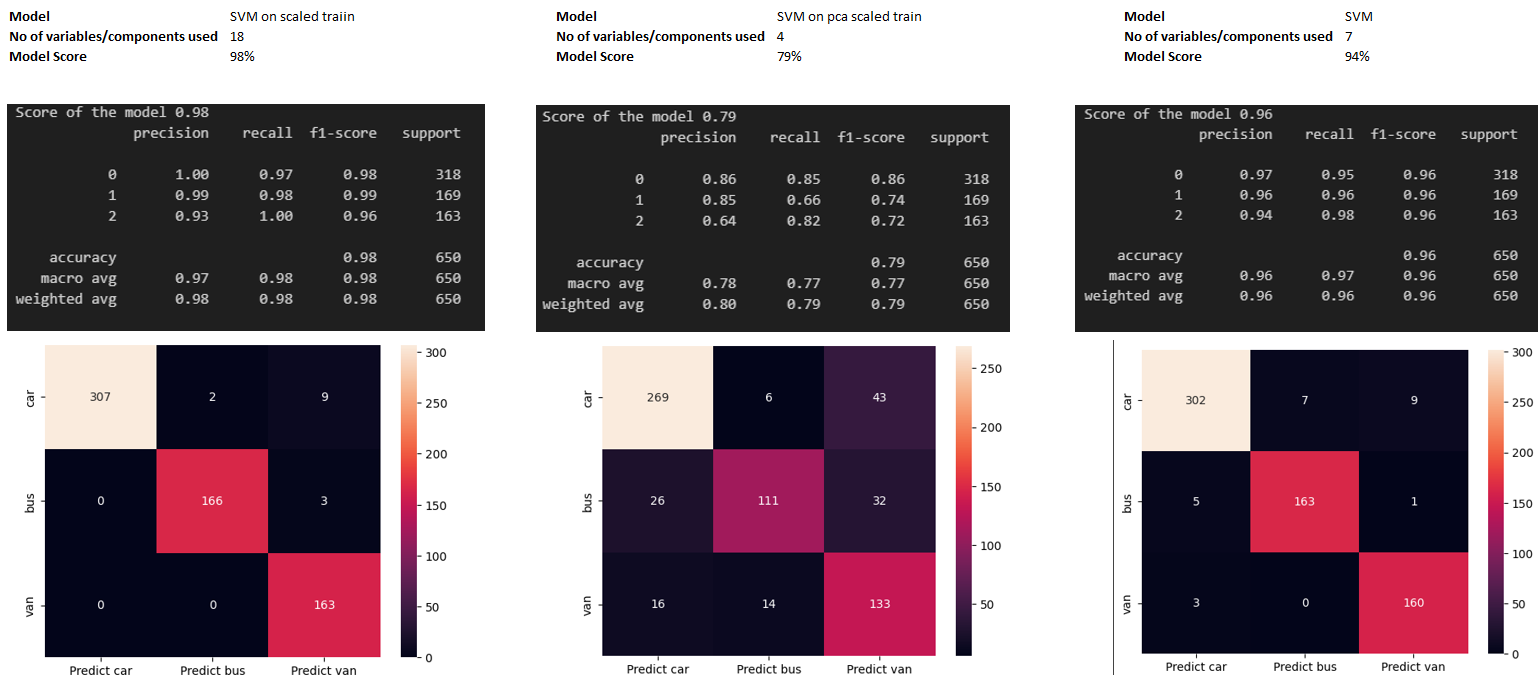

* First Model gave us a score of 98% while using all the information i.e. 19 fields
* Second Model gave us a score of 79% while using only 4 components
* Third & final Model gave us a score of 96% while using only 7 components

* We clearly see that the third model which is using only 7 components gave us a score which is on similar line of the first model and only 2% behind it while able to drop around 63% of the information. This model thus will perform better as it will have less colineralirty between variables, lesser resource consumption

<b>5. Data Understanding & Cleaning:
<b><br>A. Explain pre-requisite/assumptions of PCA.

Principal Component Analysis (PCA) is a powerful statistical technique used for dimensionality reduction and data visualization. Before applying PCA, there are several prerequisites and assumptions to consider:

* **Linearity:** PCA assumes that the relationships between variables are linear. If the relationships are highly nonlinear, PCA might not be the best choice.
* **Scale Consistency:** PCA is sensitive to the scale of the variables. It's essential to standardize the variables (subtracting the mean and dividing by the standard deviation) if they are measured on different scales. This ensures that all variables contribute equally to the analysis.
* **Zero Mean:** PCA assumes that the variables have a mean of zero. If the data is not centered around zero, it's essential to subtract the mean from each variable.
* **Homoscedasticity:** PCA works best with variables that have a constant variance (homoscedasticity). If the variables have varying variances, it might be necessary to transform them to achieve constant variance.
* **Independence:** PCA assumes that the variables are statistically independent of each other. If the variables are highly correlated, PCA may not effectively capture the underlying structure of the data.
* **Large Variance Matters:** PCA identifies the directions (principal components) that maximize the variance in the data. Therefore, variables with larger variances will have a more substantial influence on the principal components.
* **Orthogonality of Components:** PCA assumes that the principal components are orthogonal (uncorrelated) to each other. This property simplifies interpretation and ensures that each component captures a unique aspect of the variation in the data.
* **Eigenvalues > 0:** PCA computes eigenvalues and eigenvectors of the covariance or correlation matrix. It assumes that all eigenvalues are greater than or equal to zero. A negative eigenvalue indicates that the data might not be appropriate for PCA.
* **Data Matrix Dimensions:** PCA requires a dataset with more observations (rows) than variables (columns) to effectively capture the underlying structure of the data.


By ensuring these prerequisites and assumptions are met, PCA can provide valuable insights into the structure of high-dimensional data and aid in tasks such as data visualization, noise reduction, and feature extraction.

<b>B. Explain advantages and limitations of PCA.

Principal Component Analysis (PCA) offers several advantages and comes with certain limitations:

##### Advantages:

* **Dimensionality Reduction:** PCA helps in reducing the number of variables by transforming them into a new set of uncorrelated variables called principal components. This reduction simplifies the dataset while preserving as much of the original variance as possible.
* **Data Visualization:** PCA allows for the visualization of high-dimensional data in a lower-dimensional space (typically two or three dimensions). This visualization aids in understanding the underlying structure of the data and identifying patterns or clusters.
* **Noise Reduction:** PCA can filter out noise and focus on the essential underlying structure of the data by capturing the directions of maximum variance. This makes the data more robust and less susceptible to overfitting.
* **Feature Extraction:** PCA can be used to extract the most informative features from a dataset. The principal components represent combinations of the original variables, which can often capture the essential characteristics of the data more efficiently.
* **Collinearity Handling:** PCA addresses the issue of multicollinearity by creating orthogonal components, thus reducing the correlation between variables. This property is beneficial in situations where variables are highly correlated.

##### Limitations:

* **Linearity Assumption:** PCA assumes that the relationships between variables are linear. If the relationships are highly nonlinear, PCA may not capture the underlying structure effectively.
* **Interpretability:** While PCA simplifies the dataset by reducing its dimensionality, interpreting the principal components can be challenging, especially when dealing with a large number of variables. The meaning of each principal component may not always be straightforward.
* **Information Loss:** Dimensionality reduction inevitably leads to some information loss. Although PCA aims to retain as much variance as possible, the discarded variance may contain valuable information, especially in certain applications where all dimensions are relevant.
* **Scale Sensitivity:** PCA is sensitive to the scale of the variables. Variables with larger scales may dominate the principal components, potentially masking the contributions of variables with smaller scales. It's essential to standardize the variables before applying PCA to avoid this issue.
* **Outliers Sensitivity:** PCA is sensitive to outliers, as they can disproportionately affect the estimation of the covariance or correlation matrix. Outliers may distort the principal components, leading to misleading results. Preprocessing steps such as outlier detection and removal are often necessary.


* Despite these limitations, PCA remains a widely used technique in various fields such as statistics, machine learning, and data analysis due to its ability to uncover the underlying structure of complex datasets and facilitate data-driven decision-making.